Chapter 7 Data Clean, Transform, Merge and Reshape

Combing and Merging Data Sets:  
pandas.merge: connect rows in Dataframe based on one or more keys

pandas.concat:

combine_first

In [3]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

In [8]:
#Pandas.merge: Database-style DataFrame Merges
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})

print(df1)
print(df2)

# df1 and df2 is an example of one to many realtionship 
print(pd.merge(df1,df2)) # merge based on the column which has the same name
print(pd.merge(df1,df2,on = 'key')) #specify merge based on key



   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0


In [14]:
#if the key has different name? how to merge?
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
print(df3)
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
print(df4)

#inner join 
pd.merge(df3,df4,left_on = 'lkey',right_on = 'rkey')

#c and d is missing from the result, cause the merge dose an 'inner join'

# How can we do left, right and outer join
print(pd.merge(df1,df2,how = 'outer'))
print(pd.merge(df1,df2,how = 'left'))
print(pd.merge(df1,df2,how = 'right'))

   data1 lkey
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b
   data2 rkey
0      0    a
1      1    b
2      2    d
   data1 key  data2
0    0.0   b    1.0
1    1.0   b    1.0
2    6.0   b    1.0
3    2.0   a    0.0
4    4.0   a    0.0
5    5.0   a    0.0
6    3.0   c    NaN
7    NaN   d    2.0
   data1 key  data2
0      0   b    1.0
1      1   b    1.0
2      2   a    0.0
3      3   c    NaN
4      4   a    0.0
5      5   a    0.0
6      6   b    1.0
   data1 key  data2
0    0.0   b      1
1    1.0   b      1
2    6.0   b      1
3    2.0   a      0
4    4.0   a      0
5    5.0   a      0
6    NaN   d      2


In [18]:
#many to many join 
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

print(df1)
print(df2)

#inner join
print(pd.merge(df1,df2,how = 'inner'))

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b
   data2 key
0      0   a
1      1   b
2      2   a
3      3   b
4      4   d
   data1 key  data2
0      0   b      1
1      0   b      3
2      1   b      1
3      1   b      3
4      5   b      1
5      5   b      3
6      2   a      0
7      2   a      2
8      4   a      0
9      4   a      2


In [21]:
#merge with multiple keys
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
print(pd.merge(left, right, on=['key1', 'key2'], how='outer'))

  key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0


In [25]:
# how to deal with overlapping column names
print(pd.merge(left,right,on='key1'))

print(pd.merge(left,right, on = 'key1', suffixes = ('_left','_right')))

  key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7
  key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7


In [34]:
# merge on index 
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                   'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

print(left1)
print(right1)

pd.merge(left1,right1,left_on = 'key', right_index = True)

# how about outer join
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

# hierarchically - index data 
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],[2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
print(lefth)
print(righth)

print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True))
print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer'))

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
   data    key1  key2
0   0.0    Ohio  2000
1   1.0    Ohio  2001
2   2.0    Ohio  2002
3   3.0  Nevada  2001
4   4.0  Nevada  2002
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11
   data    key1  key2  event1  event2
0   0.0    Ohio  2000       4       5
0   0.0    Ohio  2000       6       7
1   1.0    Ohio  2001       8       9
2   2.0    Ohio  2002      10      11
3   3.0  Nevada  2001       0       1
   data    key1  key2  event1  event2
0   0.0    Ohio  2000     4.0     5.0
0   0.0    Ohio  2000     6.0     7.0
1   1.0    Ohio  2001     8.0     9.0
2   2.0    Ohio  2002    10.0    11.0
3   3.0  Nevada  2001     0.0     1.0
4   4.0  Nevada  2002     NaN     NaN
4   NaN  Nevada  2000     2.0     3.0


In [36]:
# using index of both side of dataset
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
print(left2)
print(right2)

pd.merge(left2,right2,how = 'outer', left_index = True, right_index = True)
    

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0


,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [40]:
# merge using join
print(left2)
print(right2)

left2.join(right2, how = 'outer')


print(left1)
print(right1)
left1.join(right1, on = 'key')

#join 3 dataframe together
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
left2.join([right2,another]) #default is inner join, want to use others, add how


   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


Reshaping and Pivoting: 
reshaping with hierarchical indexing/
pivoting long to wide format

Data Transformation:
    Removing Duplicates/ 
    Transforming Data Using a Function or Mapping/
    Replacing Values/
    Renaming Axis Indexes/
    Discretization and Binning/
    Detecting and Filtering Outliers/
    Permutation and Random Sampling/
    Computing Indicator & Dummy Variable 

In [53]:
# removing duplicates
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
print(data)
print(data.duplicated())
print(data.drop_duplicates()) # return where the duplicated array is true

data['v1'] = range(7)

# want to filter duplicated only based on k1
print(data.drop_duplicates(['k1']))
print(data.drop_duplicates(['k1', 'k2'], take_last = True)) #drop_duplicates() got an unexpected keyword argument 'take_last'


    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4
    k1  k2  v1
0  one   1   0
3  two   3   3


TypeError: drop_duplicates() got an unexpected keyword argument 'take_last'

In [58]:
# Transforming data using a function or mapping
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
print(data)

#add a column
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

#some of the meats above are capitalized and others are not, we need to 
#convert each value to lower case
print(data['animal'] = data['food'].map(str.lower).map(meat_to_animal))
# can pass lambda function
## apply map is used to map elements in a dataframe 
####print(data['food'].map(lambda x: meat_to_animal[x.lower()]))


          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object


In [66]:
# replacing values
data = Series([1., -999., 2., -999., -1000., 3.])
print(data)

#replace -999.0 and -1000 with NA
#data.replace(-999,np.nan)
data.replace([-999, -1000], np.nan)

#replace -999.0 and -1000 with NA and 0
data.replace([-999, -1000], [np.nan, 0])

### data.replace({-999: np.nan, -1000: 0})


0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64


0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [74]:
# Renaming index
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
print(data)
# map method
data.index = data.index.map(str.upper) # array([OHIO, COLORADO, NEW YORK], dtype=object)
print(data)

# change the column name, why it doesn't works? 
data.rename(index=str.title, columns=str.upper)
print(data)

# change the value of index or title, why it doesn;t works?
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'})
print(data)


          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [5]:
# Discretization and Bining
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
#Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To
#do so, you have to use cut, a function in pandas:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)

print(type(cats)) # can be treate as an array of strings indicating the bin name
print(cats)

print(pd.value_counts(cats))


<class 'pandas.core.categorical.Categorical'>
[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [6]:
# put the label name
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

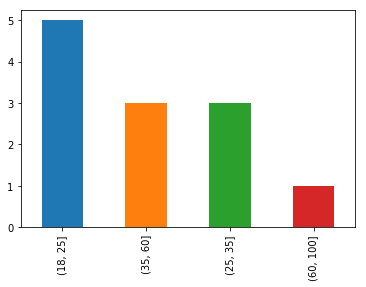

In [8]:
%matplotlib inline
pd.value_counts(cats).plot(kind = 'bar')

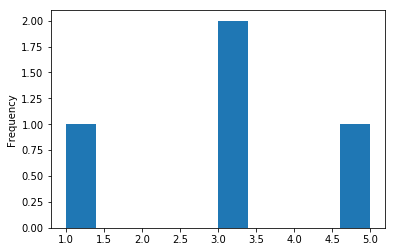

In [9]:
pd.value_counts(cats).plot(kind = 'hist')

In [24]:
# detecting and filter outliers
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()  # show data's statistic output of each column

# select all rows having a value exceeding 3 or -3
# 
data[(np.abs(data) > 3).any(1)]
data

data2 = data.any(axis = 1)
data2


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
970    True
971    True
972    True
973    True
974    True
975    True
976    True
977    True
978    True
979    True
980    True
981    True
982    True
983    True
984    True
985    True
986    True
987    True
988    True
989    True
990    True
991    True
992    True
993    True
994    True
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [25]:
#reshaping with hierarchical indexing 
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
print(data)

#has row and column two index
result = data.stack()
#using the stack method on this data pivots the columns into the rows
print(result)


number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64


In [27]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
print(data2)
#rearrange the data 
print(data2.unstack())
#Unstacking might introduce missing data if all of the values in the level aren’t found in
#each of the subgroups,Stacking filters out missing data by default
print(data2.unstack().stack() )
print(data2.unstack().stack(dropna=False))


one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64
       a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0
one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64
one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64


In [22]:
#When unstacking in a DataFrame, the level unstacked becomes the lowest level in the
#result:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
print(df)
print(df.unstack('state')) #unstack it by using state, it unstack state and side

print(df.unstack('state').stack('side')) #just unstack the state


side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10
side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10
state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7


# String Manipulation:
String Object Method/
Regular Expressions/
Vectorized String functions in pandas

In [30]:
# .join, index, count
pieces = ['a', 'b', 'guidoa']
val = ':'.join(pieces)
print(val)



a:b:guidoa


In [33]:
# 
#Using Python’s in keyword is the best way to detect a substring,
print(val.index(':'))

1


In [36]:
#return number of occurences of a particular substring
print(val.count('a'))

2


In [35]:
#replace method, replace b by ;
print(val.replace('b', ';'))


2
a:;:guidoa


In [4]:
pd.__version__


'0.22.0'

In [39]:
# regular expression
import re
text = "foo bar\t baz \tqux"
re.split('\s+', text)

print(text)

#When you call re.split('\s+', text), the regular expression is first compiled, then its
#split method is called on the passed text. You can compile the regex yourself with
#re.compile, forming a reusable regex object:

regex = re.compile('\s+')
regex.split(text)
regex.findall(text)

#Creating a regex object with re.compile is highly recommended if you intend to apply
#the same expression to many strings; doing so will save CPU cycles.

text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
print(text)
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
print(pattern)

regex = re.compile(pattern, flags=re.IGNORECASE)

regex.findall(text)

#sub will return a new string with occurrences of the pattern replaced by the
#a new string:
print(regex.sub('redacted',text))


foo bar	 baz 	qux
Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com

[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}
Dave redacted
Steve redacted
Rob redacted
Ryan redacted



In [40]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
print(text)
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
print(pattern)

Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com

[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}


In [122]:
#Vectorized string functions in pandas
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)
#print(data)
#print(data.isnull())

#print(data.str.contains('gmail'))

#print(pattern)

print(data.str.findall(pattern, flags=re.IGNORECASE))

matches = data.str.match(pattern, flags=re.IGNORECASE)
print(matches)
print(matches.str.get(1))
print(matches.str[0])

Dave     [dave@google.com]
Rob        [rob@gmail.com]
Steve    [steve@gmail.com]
Wes                    NaN
dtype: object
Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object
Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64
Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64
